## Importing Libraries

In [910]:
import matplotlib.pyplot as plt        # visualization
import numpy as np                     # matrices and high-level math functions
import pandas as pd                    # data manipulation
import seaborn as sns                  # visualization (based on matplotlib)
from scipy import stats                # statistic package 

# Changing categorical variables
from sklearn.preprocessing import LabelEncoder

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Accuracy calculations:
from sklearn import metrics  

# Regression tools:
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression

# Training and test sets:
from sklearn.model_selection import train_test_split

# Dealing with imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# Saving DataFrame to png:
import dataframe_image as dfi


## Data Extraction

Data extracted from CSV files *(employee_survey_data.csv, general_data.csv, manager_survey_data.csv)*

In [4]:
employee_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/employee_survey_data.csv')
general_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/general_data.csv')
manager_df = pd.read_csv('/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/data-sets/attrition/manager_survey_data.csv')


Looking at each individual table and their shapes

In [544]:
print(general_df.shape)
general_df.head(1)

(4410, 24)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0


In [545]:
print(manager_df.shape)
manager_df.head(1)

(4410, 3)


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3


In [546]:
print(employee_df.shape)
employee_df.head(1)

(4410, 4)


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0


Merge all three dataframes on employee id (same number of rows, assuming same employee numbers)

In [549]:
combined_df = general_df.merge(employee_df, on='EmployeeID')
combined_df = combined_df.merge(manager_df, on='EmployeeID')
combined_df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3


In [550]:
# Looking at size of dataframe
print("df.shape =", combined_df.shape)
print("Number of rows =", combined_df.shape[0])
print("Number of columns =", combined_df.shape[1])

df.shape = (4410, 29)
Number of rows = 4410
Number of columns = 29


Same number of rows (employees) and the columns put together (24+3+4 -2)

## DataFrame Cleanup

In [551]:
# Summary of stats for the whole dataframe
combined_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [14]:
# All data types for the dataframe
combined_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [552]:
# Determine if there are any missing datapoints or duplicate rows in the dataset
print("\nAre there any missing datapoints in the dataset?", combined_df.isnull().values.any())
print("\nHow many missing datapoints in the dataset?\n", combined_df.isnull().sum())
print("\nNumber of duplicated rows:", combined_df.duplicated().sum())


Are there any missing datapoints in the dataset? True

How many missing datapoints in the dataset?
 Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

Number of dupli

As can be seen there are 5 columns which are missing varying level of data. Checking if there is an overlap between missing information for employees:

In [553]:
numcompanies_list = combined_df[combined_df['NumCompaniesWorked'].isnull()]['EmployeeID'].values.tolist()
totalworking_list = combined_df[combined_df['TotalWorkingYears'].isnull()]['EmployeeID'].values.tolist()

combined = []

for a in numcompanies_list:
    for b in totalworking_list:
        if a == b:
            combined.append(a)

combined

[]

In [554]:
job_list = combined_df[combined_df['JobSatisfaction'].isnull()]['EmployeeID'].values.tolist()
environment_list = combined_df[combined_df['EnvironmentSatisfaction'].isnull()]['EmployeeID'].values.tolist()

combined = []

for a in job_list:
    for b in environment_list:
        if a == b:
            combined.append(a)

combined

[]

We cannot find any that are overlapping but based on the fact that there are 4410 employees, the amount of data missing is not significant. To combat this, we can either drop the entire row or use data imputation strategies. Since having more data is always better, we will replace missing values with mean value substitution (cite: paper finding best practices for replacing missing value data https://onlinelibrary.wiley.com/doi/abs/10.1002/bimj.4710310106). 

Since the values we will be replacing are whole numbers, we will use the round function to make sure our new data points are in line with the rest of the data.

In [18]:
df = combined_df.copy()
df['NumCompaniesWorked'].fillna(value=round(df['NumCompaniesWorked'].mean()), inplace=True)
df['TotalWorkingYears'].fillna(value=round(df['TotalWorkingYears'].mean()), inplace=True)
df['EnvironmentSatisfaction'].fillna(value=round(df['EnvironmentSatisfaction'].mean()), inplace=True)
df['JobSatisfaction'].fillna(value=round(df['JobSatisfaction'].mean()), inplace=True)
df['WorkLifeBalance'].fillna(value=round(df['WorkLifeBalance'].mean()), inplace=True)

In [19]:
# Checking to see if we were successfull in replacing all nulls:
print("\nHow many missing datapoints in the dataset?\n", df.isnull().sum())


How many missing datapoints in the dataset?
 Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64


In [555]:
# Checking specific value of employee who had NaN for "NumCompaniesWorked"; mean is 2.694830, therefore, expected 3. Works well.
# df.iloc[115]

All null datapoints have been replaced with the rounded mean of the column.

## Plotting Data

Plotting graphs for independent variables with what I think might have an impact on attrition:
- NumCompaniesWorked
- Education
- JobLevel
- PercentSalaryHike
- StockOptionLevel
- TrainingTimesLastYear
- TotalWorkingYears
- YearsAtCompany
- YearsSinceLastPromotion
- YearsWithCurrManager
- EnvironmentSatisfaction
- JobSatisfaction
- WorkLifeBalance
- JobInvolvement
- PerformanceRating
- MaritalStatus
- DistanceFromHome
- Age

vs dependent variable of Attrition

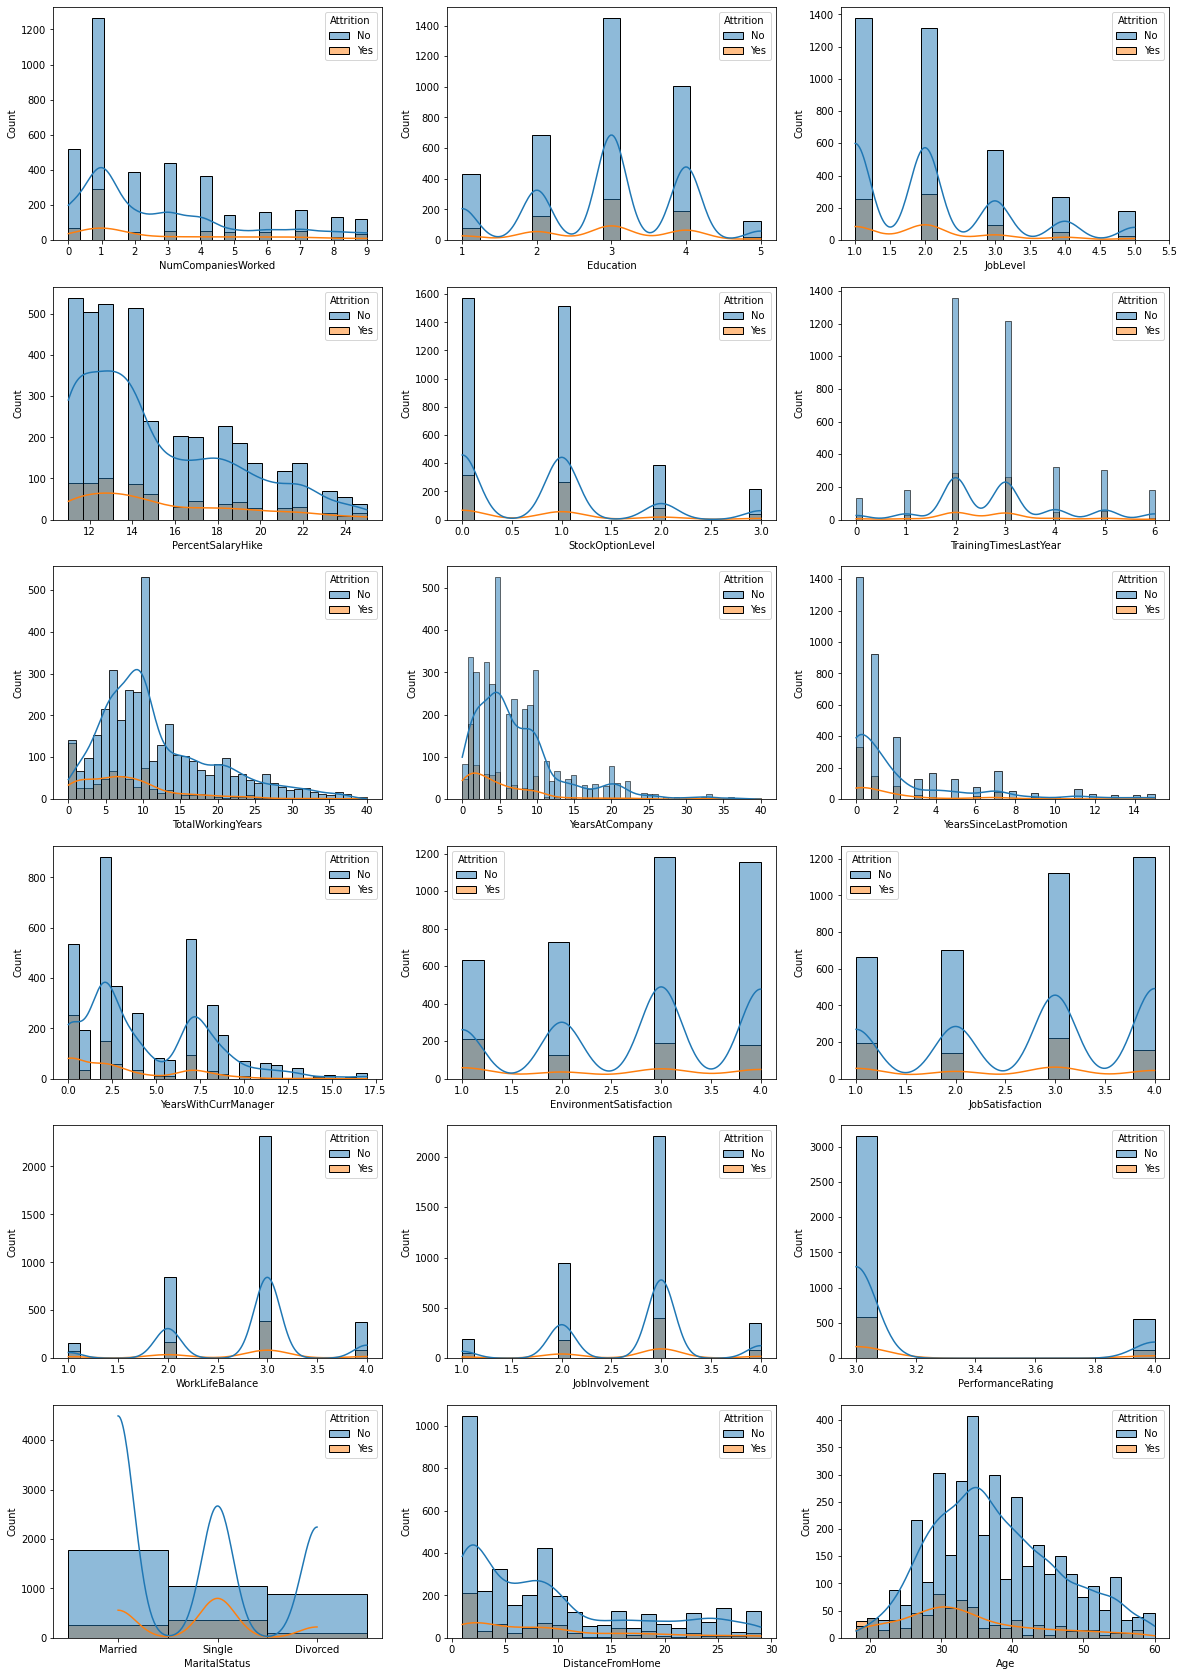

In [22]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8), (ax9, ax10, ax11), (ax12, ax13, ax14), (ax15, ax16, ax17)) = plt.subplots(6, 3, figsize=(20,30))
sns.histplot(x='NumCompaniesWorked', hue='Attrition', data=df, ax=ax0, kde=True);#, binwidth=0.55
ax0.set_xticks(np.arange(0, 10, 1))
sns.histplot(x='Education', hue='Attrition', data=df, ax=ax1, kde=True);
ax1.set_xticks(np.arange(1, 6, 1))
sns.histplot(x='JobLevel', hue='Attrition', data=df, ax=ax2, kde=True);
ax2.set_xticks(np.arange(1, 6, 0.5))

sns.histplot(x='PercentSalaryHike', hue='Attrition', data=df, ax=ax3, kde=True);
sns.histplot(x='StockOptionLevel', hue='Attrition', data=df, ax=ax4, kde=True);
sns.histplot(x='TrainingTimesLastYear', hue='Attrition', data=df, ax=ax5, kde=True);

sns.histplot(x='TotalWorkingYears', hue='Attrition', data=df, ax=ax6, kde=True);
sns.histplot(x='YearsAtCompany', hue='Attrition', data=df, ax=ax7, kde=True);
sns.histplot(x='YearsSinceLastPromotion', hue='Attrition', data=df, ax=ax8, kde=True);

sns.histplot(x='YearsWithCurrManager', hue='Attrition', data=df, ax=ax9, kde=True);
sns.histplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, ax=ax10, kde=True);
sns.histplot(x='JobSatisfaction', hue='Attrition', data=df, ax=ax11, kde=True);

sns.histplot(x='WorkLifeBalance', hue='Attrition', data=df, ax=ax12, kde=True);
sns.histplot(x='JobInvolvement', hue='Attrition', data=df, ax=ax13, kde=True);
sns.histplot(x='PerformanceRating', hue='Attrition', data=df, ax=ax14, kde=True);

sns.histplot(x='MaritalStatus', hue='Attrition', data=df, ax=ax15, kde=True);
sns.histplot(x='DistanceFromHome', hue='Attrition', data=df, ax=ax16, kde=True);
sns.histplot(x='Age', hue='Attrition', data=df, ax=ax17, kde=True);


***Initial "naive" conclusions from the graphs above:***
- 'JobLevel' seems to have an affect (2 seems slightly higher than the rest)
- 'TotalYearsWorked' seems to have an affect on attrition (less time more attrition)
- 'YearsAtCompany' seems to have a very big spike at 1 year, therefore, this could have an affect on attrition
- 'YearsWithCurrManager' seems to have some impact on attrition (earlier seems higher)
- 'JobSatisfaction' seems to have an affect at a higher satisfaction (less leaving at level 4 but more at level 3)
- 'Age' seems to have more of an attrition rate the younger the employee
- 'MaritialStatus' seems to suggest that single people have a higher attrition rate


Checking for gender imbalance:

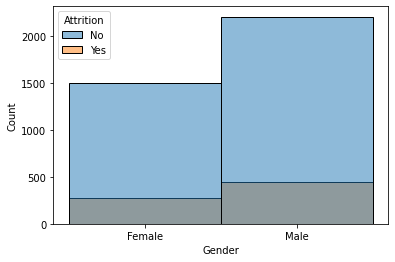

In [1028]:
sns.histplot(x='Gender', hue='Attrition', data=df);

## Data Pre-processing

Given that we wish to use a regression model and some of the features are non-numeric, nominal data (categories do not have an inherent order) we must transform them via feature encoding.    

There are several encoding strategies and can vary depending on the nature of the feature.
- Simple: https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/?utm_source=blog&utm_medium=Categorical_data_encoding
- More complex encodings: https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
  
For this case, I have chosen the simple label encoder. It turns the labels to values between 0 and n_classes-1.

In [557]:
# Getting a list of columns
# df.columns

In [366]:
# Getting unique values for all variables:
# print(df['Over18'].unique())

- 'StandardHours' is always [8]  
- 'EmployeeCount' is always [1]  
- 'Over18' is always ['Y']  

**These will not provide signal, so we will drop them.**

In [572]:
new_df = df.copy()
encoder = LabelEncoder()

new_df['Attrition_encoded'] = encoder.fit_transform(df['Attrition']) # ['No' 'Yes']
new_df['BusinessTravel_encoded'] = encoder.fit_transform(df['BusinessTravel']) # ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
new_df['Department_encoded'] = encoder.fit_transform(df['Department']) # ['Sales' 'Research & Development' 'Human Resources']
new_df['EducationField_encoded'] = encoder.fit_transform(df['EducationField']) # ['Human Resources''Life Sciences' 'Medical'  'Marketing'  'Other' 'Technical Degree' ]
new_df['Gender_encoded'] = encoder.fit_transform(df['Gender']) # ['Female' 'Male']
new_df['JobRole_encoded'] = encoder.fit_transform(df['JobRole']) # In order: ['Healthcare Representative' 'Human Resources' 'Manager' 'Manufacturing Director''Laboratory Technician' 'Research Director' 'Research Scientist' 'Sales Executive''Sales Representative']
new_df['MaritalStatus_encoded'] = encoder.fit_transform(df['MaritalStatus']) # ['Married' 'Single' 'Divorced'] encoded as: [1, 2, 0]
# new_df['Over18_encoded'] = encoder.fit_transform(df['Over18']) # ['Y'] Do not encode, just drop because only one value. Does not add anything

# Dropping duplicate rows that were encoded above & the columns that do not provide signal:
new_df = new_df.drop(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18','StandardHours','EmployeeCount'], axis=1)

# Check columns:
new_df.columns


Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeID', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition_encoded',
       'BusinessTravel_encoded', 'Department_encoded',
       'EducationField_encoded', 'Gender_encoded', 'JobRole_encoded',
       'MaritalStatus_encoded'],
      dtype='object')

## Collinearity

When doing regressions it is important to check for collinearity between variables. The more independent the variables are from one another, the better it is for a regression model.   

The correlation matrix shows correlation coefficient values, where below 0.3 are considered to be weak; 0.3-0.7 are moderate; >0.7 are strong. 

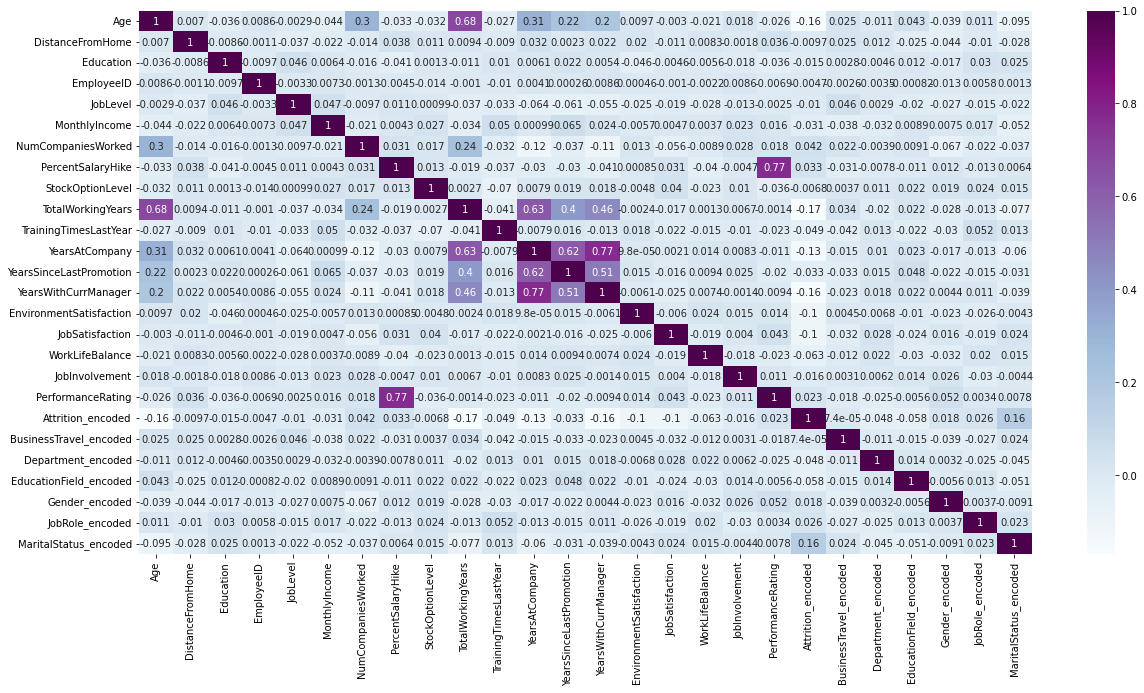

In [562]:
# Use a heatmap to check for collinearity between variables
# A higher (darker/puple) value represents higher correlation between two variables
# A lower (lighter/blue) value represents lower correlation between two variables
plt.figure(figsize=(20, 10))
sns.heatmap(new_df.corr(), cmap='BuPu', annot=True);

**Important to note:** as can be seen with the confusion matrix, some of these variables are highly correlated with each other (e.g. age and years at company), so it might be tough for the logistical regression to further separate these. 

Here are the relationships which are strongly correlated:
- 'PercentSalaryHike' 0.77 'PerformanceRating'
- 'Age' 0.68 'TotalWorkingYears'
- 'YearsAtCompany' 0.63 'TotalWorkingYears'
- 'YearsAtCompany' 0.77 'YearsWithCurrManager'
- 'YearsAtCompany' 0.62 'YearsSinceLastPromotion'

When we look at the variables which are moderately to strongly correlated, they are variables that make sense to go hand in hand. But **independence of variables is a condition for regression**. So we will check for multi-collinearity.

**Checking for multi-collinearity:**

VIF(variance inflation factor) method "measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables." (https://www.investopedia.com/terms/v/variance-inflation-factor.asp#)

Using the VIF method "allows you to determine the strength of the correlation between the various independent variables. It is calculated by taking a variable and regressing it against every other variables." (https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f)

Mathematically, it is a calculation of
$$ \frac{1}{1-R^2}$$



In [567]:
# Using guidance from: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/ 

pre_removal = new_df.drop(['Attrition_encoded'], axis=1)
  
# VIF dataframe
vif_data_pre = pd.DataFrame()
vif_data_pre["feature"] = pre_removal.columns
  
# calculating VIF for each feature
vif_data_pre["VIF"] = [variance_inflation_factor(pre_removal.values, i)
                          for i in range(len(pre_removal.columns))]
  
# print(vif_data_pre) 

                    feature       VIF
0                       Age  2.009686
1          DistanceFromHome  1.010661
2                 Education  1.010858
3             EmployeeCount  0.000000
4                EmployeeID  1.001211
5                  JobLevel  1.019933
6             MonthlyIncome  1.024120
7        NumCompaniesWorked  1.249273
8         PercentSalaryHike  2.530846
9             StandardHours  0.000000
10         StockOptionLevel  1.020075
11        TotalWorkingYears  3.089709
12    TrainingTimesLastYear  1.021305
13           YearsAtCompany  3.957102
14  YearsSinceLastPromotion  1.654676
15     YearsWithCurrManager  2.489509
16  EnvironmentSatisfaction  1.006807
17          JobSatisfaction  1.014519
18          WorkLifeBalance  1.009372
19           JobInvolvement  1.006155
20        PerformanceRating  2.533054
21   BusinessTravel_encoded  1.015372
22       Department_encoded  1.009160
23   EducationField_encoded  1.011302
24           Gender_encoded  1.020301
25          

/usr/local/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [574]:
post_removal = new_df.drop(['Attrition_encoded'], axis=1)
  
# VIF dataframe
vif_data_post = pd.DataFrame()
vif_data_post["feature"] = post_removal.columns
  
# calculating VIF for each feature
vif_data_post["VIF"] = [variance_inflation_factor(post_removal.values, i)
                          for i in range(len(post_removal.columns))]

print(vif_data_post)

                    feature         VIF
0                       Age   31.278032
1          DistanceFromHome    2.301134
2                 Education    8.722257
3                EmployeeID    3.944014
4                  JobLevel    4.472038
5             MonthlyIncome    2.958988
6        NumCompaniesWorked    2.707148
7         PercentSalaryHike   43.455434
8          StockOptionLevel    1.881489
9         TotalWorkingYears    9.369671
10    TrainingTimesLastYear    5.654149
11           YearsAtCompany    9.120399
12  YearsSinceLastPromotion    2.416275
13     YearsWithCurrManager    5.806321
14  EnvironmentSatisfaction    7.112661
15          JobSatisfaction    7.105787
16          WorkLifeBalance   15.117999
17           JobInvolvement   14.845307
18        PerformanceRating  129.292770
19   BusinessTravel_encoded    6.710472
20       Department_encoded    6.553919
21   EducationField_encoded    3.839370
22           Gender_encoded    2.533890
23          JobRole_encoded    4.291632


This function does not perform correctly when "EmployeeCount" is removed. So I used a created function I found. The created function gave the same numbers as the "pre_removal". The function uses the mathematical definition of VIF.

In [ ]:
# Function from https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [578]:
X = new_df.drop('Attrition_encoded',axis=1)
tds_vif = calculate_vif(df=new_df, features=X)
# tds_vif

In [579]:
tds_vif.reset_index().merge(vif_data_pre, left_on='index', right_on='feature', suffixes=('_hers', '_sm'))

,index,VIF_hers,Tolerance,feature,VIF_sm
0,Age,2.009686,0.497590,Age,2.009686
1,DistanceFromHome,1.010661,0.989451,DistanceFromHome,1.010661
2,Education,1.010858,0.989258,Education,1.010858
3,EmployeeID,1.001211,0.998790,EmployeeID,1.001211
4,JobLevel,1.019933,0.980457,JobLevel,1.019933
5,MonthlyIncome,1.024120,0.976448,MonthlyIncome,1.024120
6,NumCompaniesWorked,1.249273,0.800466,NumCompaniesWorked,1.249273
7,PercentSalaryHike,2.530846,0.395125,PercentSalaryHike,2.530846
8,StockOptionLevel,1.020075,0.980320,StockOptionLevel,1.020075
9,TotalWorkingYears,3.089709,0.323655,TotalWorkingYears,3.089709


A rule of thumb for interpreting VIF values is:
* 1 => not correlated.
* between 1 and 5 => moderately correlated.
* greater than 5 => features are highly correlated
* above 10 => high correlation and is cause for concern

(https://www.statisticshowto.com/variance-inflation-factor/)

**As can be seen, none of the features are highly correlated**

## Data Distribution

Before doing regression, check distribution of attrition:

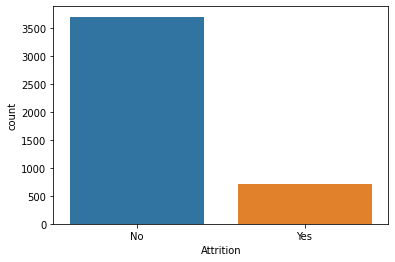

In [21]:
# Plot a countplot representing the distribution of the "attrition" variable
sns.countplot(x='Attrition', data=df);


As can be seen, the data is imbalanced. This means we must account for it in our methods. I found a great article that talked about several ways to deal with it (https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/). Here are some of the ones listed:
1) Random Under-Sampling   
2) Random Over-Sampling  
3) Random under-sampling with imblearn  
4) Random over-sampling with imblearn  
5) Under-sampling: Tomek links  
6) Synthetic Minority Oversampling Technique (SMOTE)  
7) Penalize Algorithms (Cost-Sensitive Training)  
8) Change the algorithm "Decision trees frequently perform well on imbalanced data. In modern machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.)"



For the first iteration, I went ahead with assessing the model without accounting for the imbalance. It did terrible, it was unable to predict any "yes" attrition. 

So I tried 5 methods:   
0) Control - no change in sampling from original model
1) Random over-sampling with imblearn   
2) Random under-sampling with imblearn     
3) Synthetic Minority Oversampling Technique (SMOTE)  
4) Under-sampling: Tomek links 


# Analysis:

## Method 0 - No adaption for imbalance

In [690]:
# # No columns dropped:
X0 = new_df.drop('Attrition_encoded', axis=1) 
y0 = new_df['Attrition_encoded']

# Split the dataset into X_train, X_test, y_train, and y_test
# Retain 10% of the data for testing
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.1)#, random_state=0) 


As can be seen, the accuracy is approximately the same for all trials, and even performed slightly better when all columns were included.  
**Moving forward for *all* models I will be using the full DF without removing any columns**

Checkout distribution of sets:

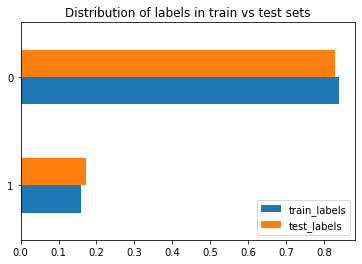

In [691]:
# Plot the distribution of train and test labels (to check if the imbalance worked)
train_labels0 = y0_train.value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
test_labels0 = y0_test.value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')

# Concatenate the number of examples in the train and test labels
label_counts0 = pd.concat([train_labels0, test_labels0], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts0.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

The training set and the test set both have equal amounts of both data

In [811]:
# Instantiate a Logistic Regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
logit_model0 = LogisticRegression()

# Fit the model using the training data
logit_model0.fit(X0_train, y0_train) 

# To print all features with regression coefficient used: https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression-in-python
model0 = pd.DataFrame(zip(X0_train.columns, np.transpose(logit_model0.coef_.tolist()[0])), columns=['features', 'coef0'])

print(logit_model0.intercept_)
model0


[0.00020473]


,features,coef0
0,Age,-0.026572
1,DistanceFromHome,0.005484
2,Education,-0.001889
3,EmployeeID,-0.000044
4,JobLevel,-0.000778
5,MonthlyIncome,-0.000002
6,NumCompaniesWorked,0.017361
7,PercentSalaryHike,0.013838
8,StockOptionLevel,-0.000094
9,TotalWorkingYears,-0.045598


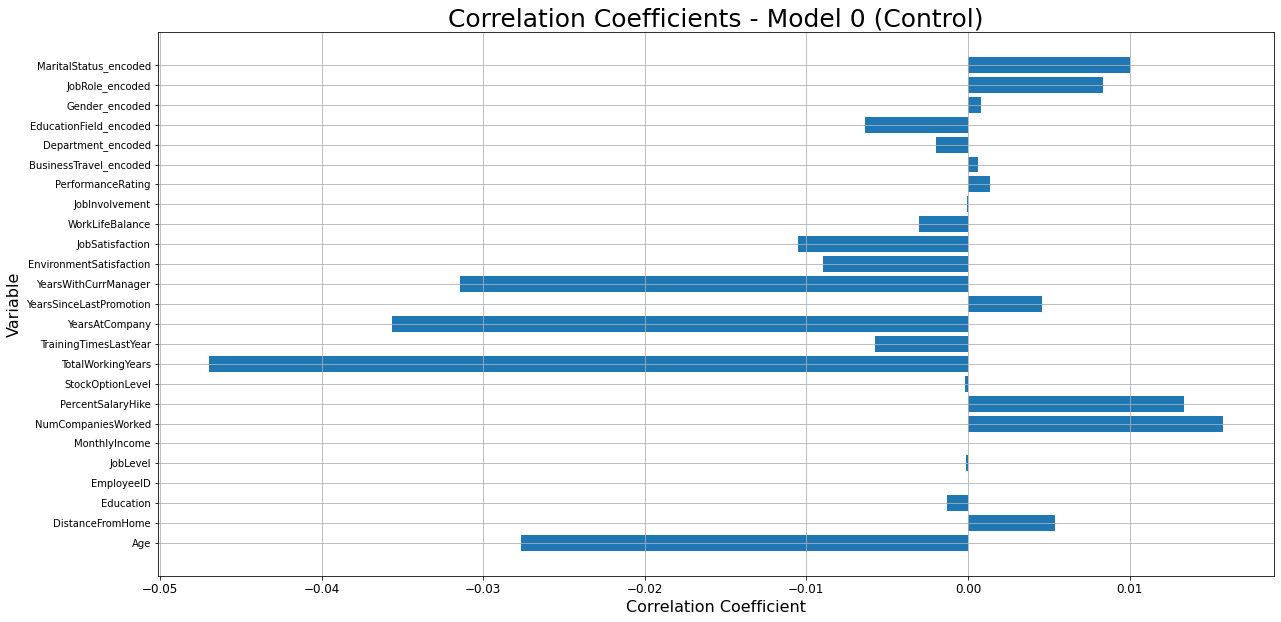

In [693]:
plt.figure(figsize=(20, 10))
plt.barh(model0['features'], model0['coef0']);
plt.title('Correlation Coefficients - Model 0 (Control)', fontsize=25)
plt.xlabel('Correlation Coefficient', fontsize=16 )
plt.ylabel('Variable', fontsize=16 )

# plt.gca() to get current axes of the plot.
ax = plt.gca()
# ax.invert_xaxis()
plt.xticks(fontsize=12);
plt.grid()
plt.show;

In [724]:
y0_pred = logit_model0.predict(X0_test)

Confusion matrix:

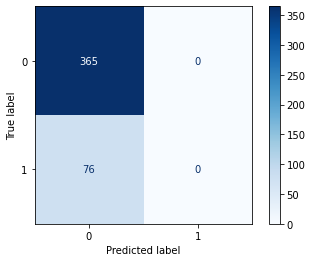

In [726]:
# Generate the Confusion Matrix for this logistic regression model
cm0 = metrics.confusion_matrix(y0_test, y0_pred, labels=logit_model0.classes_)
disp0 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=logit_model0.classes_)
disp0.plot(cmap='Blues')
plt.show()

In [806]:
# https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

accuracy0 = pd.DataFrame(metrics.classification_report(y0_test, y0_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy0


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
No Attrition,0.827664,1.000000,0.905707,365.000000
Yes Attrition,0.000000,0.000000,0.000000,76.000000
accuracy,0.827664,0.827664,0.827664,0.827664
macro avg,0.413832,0.500000,0.452854,441.000000
weighted avg,0.685028,0.827664,0.749622,441.000000


-------

## Method 1 - Oversampling (imblearn)

This model looks at fitting the regression model on the resampled set using oversampling function from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html).

Due to the highly correlated variable above (even though VIF was okay), I chose to run the logisitcal regression on different variations of columns being removed to see if it impacted the accuracy in the end (I did analyze the recall and precision, but felt that it was enough to just record the F1 accuracy score.

In [709]:
# Removed duplicate features that will not be used in the model in 5 different variations

# # Variation 1 - 'YearsAtCompany','PercentSalaryHike','TotalWorkingYears' were removed from DF:
# X1 = new_df.drop(['Attrition_encoded','YearsAtCompany','PercentSalaryHike','TotalWorkingYears'], axis=1) 
# # F1 accuracy: 0.53, 0.64, 0.67, 0.58, 0.64 => ~0.612

# # Variation 2 - 'YearsWithCurrManager','YearsSinceLastPromotion','PercentSalaryHike','TotalWorkingYears' were removed from DF:
# X1 = new_df.drop(['Attrition_encoded','YearsWithCurrManager','YearsSinceLastPromotion','PercentSalaryHike','TotalWorkingYears'], axis=1) 
# # F1 accuracy: 0.61,0.63,0.55, 0.63, 0.53 => ~0.59

# # Variation 3 - 'YearsAtCompany','PercentSalaryHike','Age' were removed from DF:
# X1 = new_df.drop(['Attrition_encoded','YearsAtCompany','PercentSalaryHike','Age'], axis=1) 
# # F1 accuracy: 0.60 0.62 0.61 0.59 0.64 => ~0.612

# # Variation 4 - 'YearsAtCompany','PerformanceRating','TotalWorkingYears' were removed from DF:
# X1 = new_df.drop(['Attrition_encoded','YearsAtCompany','PerformanceRating','TotalWorkingYears'], axis=1) 
# # F1 accuracy: 0.61 0.62 0.61 0.52 0.62 => ~0.596

# # Variation 5 - all highly correlated columns were removed from DF:
# X1 = new_df.drop(['Attrition_encoded', 'Age', 'PercentSalaryHike','JobInvolvement', 'WorkLifeBalance','PerformanceRating', 'TotalWorkingYears','YearsAtCompany','YearsWithCurrManager', 'YearsSinceLastPromotion'], axis=1) 
# # F1 accuracy: 0.51 0.48 0.52 0.52 0.47 => ~0.5
# # Performed by far the worst

# # No columns dropped:
X1 = new_df.drop('Attrition_encoded', axis=1) 
# # F1 accuracy: 0.64 0.64 0.63 0.65 0.63 => ~0.638

y1 = new_df['Attrition_encoded']

ros = RandomOverSampler()

# fit predictor and target 
variablex_ros, y_ros = ros.fit_resample(X1, y1)

print('Original dataset shape', y1.shape)
print('Resample dataset shape', y_ros.shape)

# Split the dataset into X_train, X_test, y_train, and y_test
# Retain 10% of the data for testing
X1_train, X1_test, y1_train, y1_test = train_test_split(variablex_ros, y_ros, test_size=0.1)#, random_state=0) 


Original dataset shape (4410,)
Resample dataset shape (7398,)


As can be seen, the accuracy is approximately the same for all trials, and even performed slightly better when all columns were included.  
**Moving forward for *all* models I will be using the full DF without removing any columns**

Checkout distribution of sets:

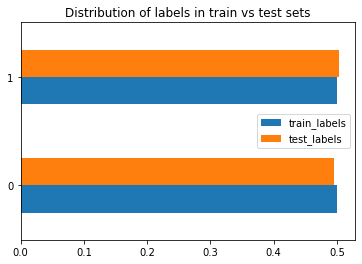

In [710]:
# Plot the distribution of train and test labels (to check if the imbalance worked)
train_labels1 = y1_train.value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
test_labels1 = y1_test.value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')

# Concatenate the number of examples in the train and test labels
label_counts1 = pd.concat([train_labels1, test_labels1], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts1.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

The training set and the test set both have equal amounts of both data

In [810]:
# Instantiate a Logistic Regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
logit_model1 = LogisticRegression()

# Fit the model using the training data
logit_model1.fit(X1_train, y1_train) 

# To print all features with regression coefficient used: https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression-in-python
model1 = pd.DataFrame(zip(X1_train.columns, np.transpose(logit_model1.coef_.tolist()[0])), columns=['features', 'coef1'])

print(logit_model1.intercept_)
model1


[0.00176502]


,features,coef1
0,Age,-0.004101
1,DistanceFromHome,0.012364
2,Education,0.004147
3,EmployeeID,0.000059
4,JobLevel,0.002926
5,MonthlyIncome,-0.000002
6,NumCompaniesWorked,0.013577
7,PercentSalaryHike,0.034588
8,StockOptionLevel,0.000939
9,TotalWorkingYears,-0.047441


Checking logit function using statsmodels, as it provides p-values (and I wanted to compare)

In [730]:
import statsmodels.api as sd
 
sd_model = sd.Logit(y1_train, X1_train).fit()
# print(sd_model.pvalues)
sd_model.summary()

Optimization terminated successfully.
         Current function value: 0.573258
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Attrition_encoded   No. Observations:                 6658
Model:                          Logit   Df Residuals:                     6633
Method:                           MLE   Df Model:                           24
Date:                Mon, 18 Apr 2022   Pseudo R-squ.:                  0.1730
Time:                        13:39:33   Log-Likelihood:                -3816.8
converged:                       True   LL-Null:                       -4615.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0138      0.004     -3.518      0.000      -0.022      -0.006
DistanceFromHome           -0.0010      0.004     -0.286      0.775      -0.008       0.006
Education                  -0.0188      0.027     -0.690      0.490      -0.072       0.035
EmployeeID               4.666e-05   2.16e-05      2.159      0.031    4.31e-06     8.9e-05
JobLevel                   -0.0437      0.026     -1.687      0.092      -0.094       0.007
MonthlyIncome           -1.639e-06   6.08e-07     -2.694      0.007   -2.83e-06   -4.47e-07
NumCompaniesWorked          0.1295      0.012     10.370      0.000       0.105       0.154
PercentSalaryHike          -0.0351      0.012     -2.986      0.003      -0.058      -0.012
StockOptionLevel            0.0004      0.033      0.013      0.990      -0.064       0.064
TotalWorkingYears          -0.0836      0.007    -11.529      0.000      -0.098      -0.069
TrainingTimesLastYear      -0.1515      0.022     -6.846      0.000      -0.195      -0.108
YearsAtCompany              0.0463      0.010      4.464      0.000       0.026       0.067
YearsSinceLastPromotion     0.1456      0.012     11.828      0.000       0.121       0.170
YearsWithCurrManager       -0.1708      0.013    -12.761      0.000      -0.197      -0.145
EnvironmentSatisfaction    -0.2851      0.025    -11.384      0.000      -0.334      -0.236
JobSatisfaction            -0.2972      0.026    -11.563      0.000      -0.348      -0.247
WorkLifeBalance            -0.2688      0.036     -7.415      0.000      -0.340      -0.198
JobInvolvement              0.0577      0.037      1.581      0.114      -0.014       0.129
PerformanceRating           1.0268      0.100     10.233      0.000       0.830       1.224
BusinessTravel_encoded      0.0476      0.043      1.106      0.269      -0.037       0.132
Department_encoded         -0.1551      0.051     -3.066      0.002      -0.254      -0.056
EducationField_encoded     -0.0940      0.021     -4.406      0.000      -0.136      -0.052
Gender_encoded              0.0748      0.057      1.303      0.193      -0.038       0.187
JobRole_encoded             0.0610      0.012      5.225      0.000       0.038       0.084
MaritalStatus_encoded       0.7378      0.039     18.841      0.000       0.661       0.815
===========================================================================================
"""

The numbers are different and it could be because scikit learn takes into consideration L1 and L2 norms when doing regressions, if it is necessary. 

**For future models, I will be using just the scikit log regres**

<function matplotlib.pyplot.show(close=None, block=None)>

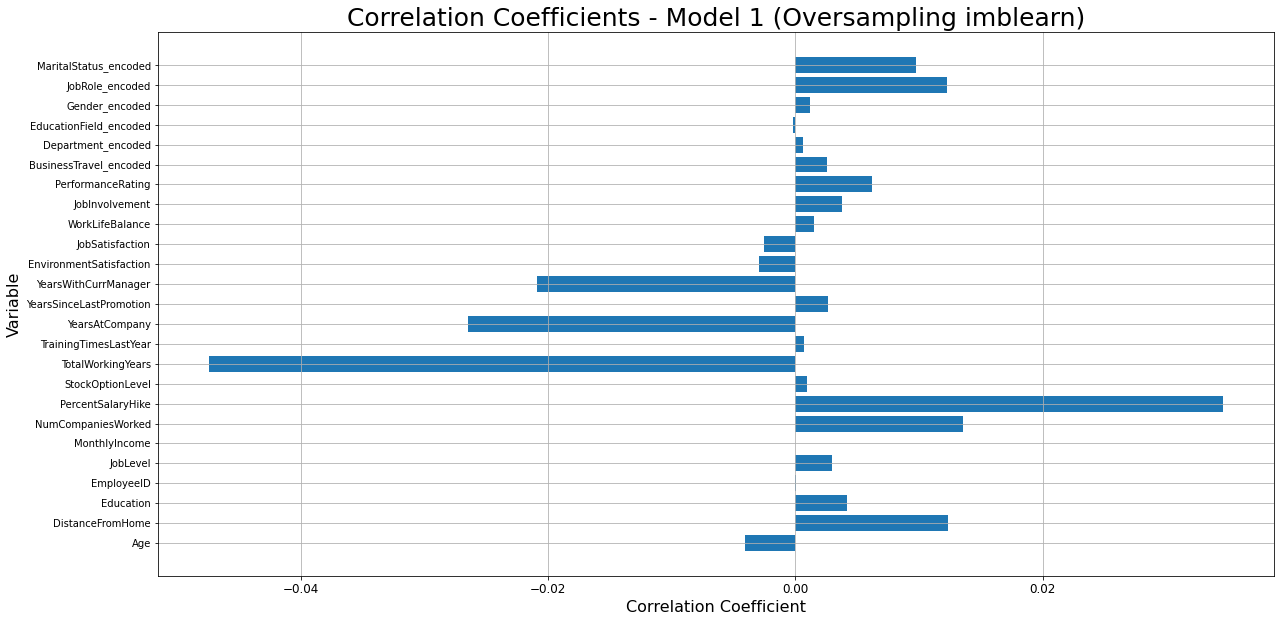

In [731]:
plt.figure(figsize=(20, 10))
plt.barh(model1['features'], model1['coef1']);
plt.title('Correlation Coefficients - Model 1 (Oversampling imblearn)', fontsize=25)
plt.xlabel('Correlation Coefficient', fontsize=16 )
plt.ylabel('Variable', fontsize=16 )

# plt.gca() to get current axes of the plot.
ax = plt.gca()
# ax.invert_xaxis()
plt.xticks(fontsize=12);
plt.grid()
plt.show

In [732]:
y1_pred = logit_model1.predict(X1_test)

Confusion matrix:

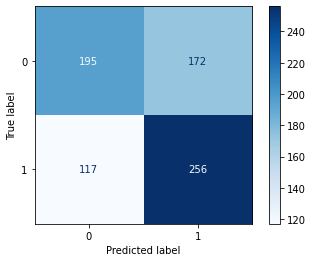

In [733]:
# Generate the Confusion Matrix for this logistic regression model
cm1 = metrics.confusion_matrix(y1_test, y1_pred, labels=logit_model1.classes_)
disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=logit_model1.classes_)
disp1.plot(cmap='Blues')
plt.show()

In [807]:
accuracy1 = pd.DataFrame(metrics.classification_report(y1_test, y1_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy1


,precision,recall,f1-score,support
No Attrition,0.625000,0.531335,0.574374,367.000000
Yes Attrition,0.598131,0.686327,0.639201,373.000000
accuracy,0.609459,0.609459,0.609459,0.609459
macro avg,0.611565,0.608831,0.606788,740.000000
weighted avg,0.611456,0.609459,0.607050,740.000000


_________

## Method 2 - Undersampling (imblearn)

This model looks at fitting the regression model on the resampled set using undersampling function from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html).

In [736]:
X2 = new_df.drop(['Attrition_encoded'], axis=1)
y2 = new_df['Attrition_encoded']

rus = RandomUnderSampler()

# fit predictor and target 
variableX_rus, y_rus = rus.fit_resample(X2, y2)

print('Original dataset shape', y2.shape)
print('Resample dataset shape', y_rus.shape)

# Split the dataset into X_train, X_test, y_train, and y_test
# Retain 10% of the data for testing
X2_train, X2_test, y2_train, y2_test = train_test_split(variableX_rus, y_rus, test_size=0.1)#, random_state=0) 

Original dataset shape (4410,)
Resample dataset shape (1422,)


Checkout distribution of sets:

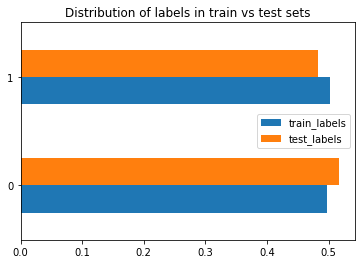

In [737]:
# Plot the distribution of train and test labels
train_labels2 = y2_train.value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
test_labels2 = y2_test.value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')

# Concatenate the number of examples in the train and test labels
label_counts2 = pd.concat([train_labels2, test_labels2], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts2.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

The training set and the test set both have equal amounts of both data

In [812]:
# Instantiate a Logistic Regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
logit_model2 = LogisticRegression()

# Fit the model using the training data
logit_model2.fit(X2_train, y2_train) 

# https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression-in-python
model2 = pd.DataFrame(zip(X2_train.columns, np.transpose(logit_model2.coef_.tolist()[0])), columns=['features', 'coef2'])
print(logit_model2.intercept_)
model2

[0.00147875]


,features,coef2
0,Age,8.164805e-05
1,DistanceFromHome,7.596212e-03
2,Education,3.565081e-03
3,EmployeeID,4.357777e-05
4,JobLevel,2.324629e-03
5,MonthlyIncome,-5.570415e-07
6,NumCompaniesWorked,1.123391e-02
7,PercentSalaryHike,2.461887e-02
8,StockOptionLevel,2.760739e-04
9,TotalWorkingYears,-4.165445e-02


<function matplotlib.pyplot.show(close=None, block=None)>

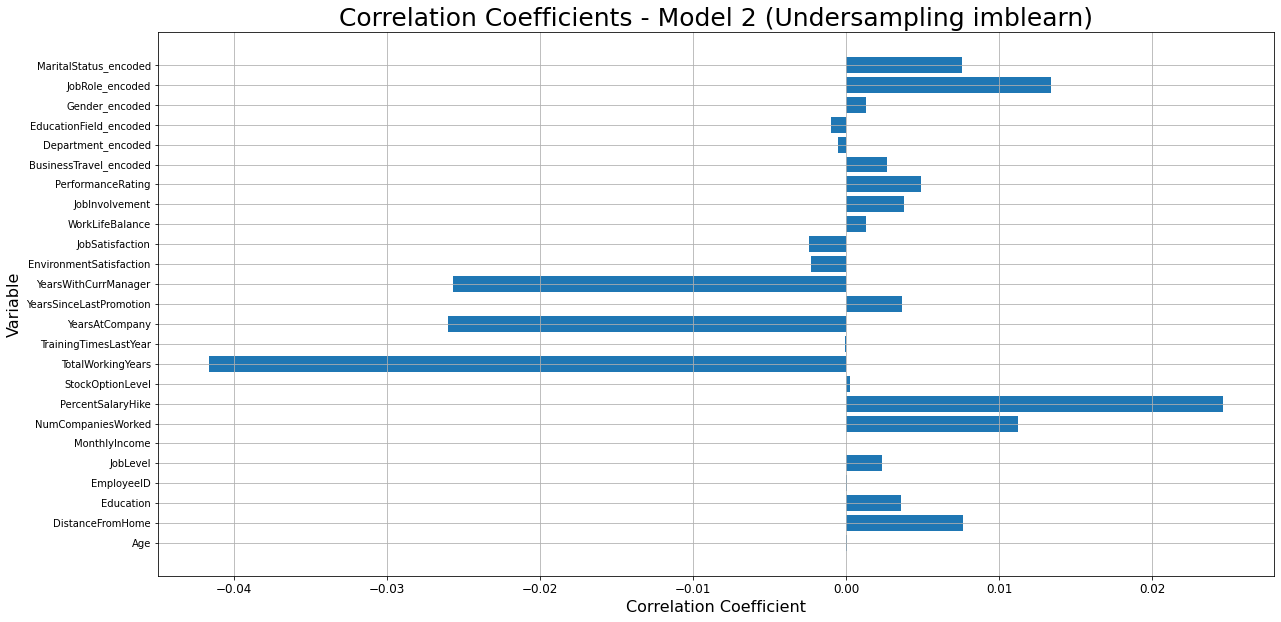

In [741]:
plt.figure(figsize=(20, 10))
plt.barh(model2['features'], model2['coef2']);
plt.title('Correlation Coefficients - Model 2 (Undersampling imblearn)', fontsize=25)
plt.xlabel('Correlation Coefficient', fontsize=16 )
plt.ylabel('Variable', fontsize=16 )

# plt.gca() to get current axes of the plot.
ax = plt.gca()
# ax.invert_xaxis()
plt.xticks(fontsize=12);
plt.grid()
plt.show

In [756]:
y2_pred = logit_model2.predict(X2_test)

confusion matrix:

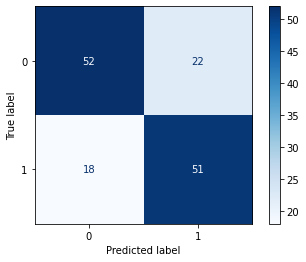

In [757]:
# Generate the Confusion Matrix for this logistic regression model
cm2 = metrics.confusion_matrix(y2_test, y2_pred, labels=logit_model2.classes_)
disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=logit_model2.classes_)
disp2.plot(cmap='Blues')
plt.show()

In [813]:
accuracy2 = pd.DataFrame(metrics.classification_report(y2_test, y2_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy2


,precision,recall,f1-score,support
No Attrition,0.742857,0.702703,0.722222,74.00000
Yes Attrition,0.698630,0.739130,0.718310,69.00000
accuracy,0.720280,0.720280,0.720280,0.72028
macro avg,0.720744,0.720917,0.720266,143.00000
weighted avg,0.721517,0.720280,0.720334,143.00000


___

## Method 3 - SMOTE

This model looks at fitting the regression model on the resampled set using SMOTE from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

SMOTE (Synthetic Minority Oversampling Technique): works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors to increase the number of minority points in the dataset.

In [1019]:
X3 = new_df.drop(['Attrition_encoded'], axis=1)
y3 = new_df['Attrition_encoded']

smote = SMOTE(k_neighbors=5)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X3, y3)

print('Original dataset shape', y3.shape)
print('Resample dataset shape', y_smote.shape)

# Split the dataset into X_train, X_test, y_train, and y_test
# Retain 10% of the data for testing
X3_train, X3_test, y3_train, y3_test = train_test_split(x_smote, y_smote, test_size=0.1)#, random_state=0) 

Original dataset shape (4410,)
Resample dataset shape (7398,)


Checkout distribution of sets:

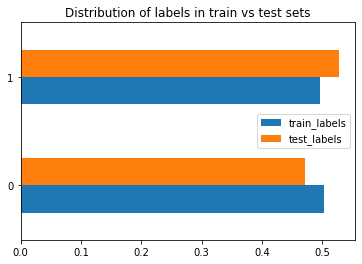

In [1020]:
# Plot the distribution of train and test labels
train_labels3 = y3_train.value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
test_labels3 = y3_test.value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')

# Concatenate the number of examples in the train and test labels
label_counts3 = pd.concat([train_labels3, test_labels3], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts3.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

The training set and the test set both have equal amounts of both data

In [1021]:
# Instantiate a Logistic Regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
logit_model3 = LogisticRegression()

# Fit the model using the training data
logit_model3.fit(X3_train, y3_train) 

# https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression-in-python
model3 = pd.DataFrame(zip(X3_train.columns, np.transpose(logit_model3.coef_.tolist()[0])), columns=['features', 'coef3'])
print(logit_model3.intercept_)
model3


[0.01753964]


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,features,coef3
0,Age,-2.720855e-02
1,DistanceFromHome,1.152232e-03
2,Education,-4.147119e-02
3,EmployeeID,1.136813e-04
4,JobLevel,-6.718248e-02
5,MonthlyIncome,-4.367615e-07
6,NumCompaniesWorked,1.441008e-01
7,PercentSalaryHike,1.156853e-01
8,StockOptionLevel,-5.444783e-02
9,TotalWorkingYears,-2.810680e-02


<function matplotlib.pyplot.show(close=None, block=None)>

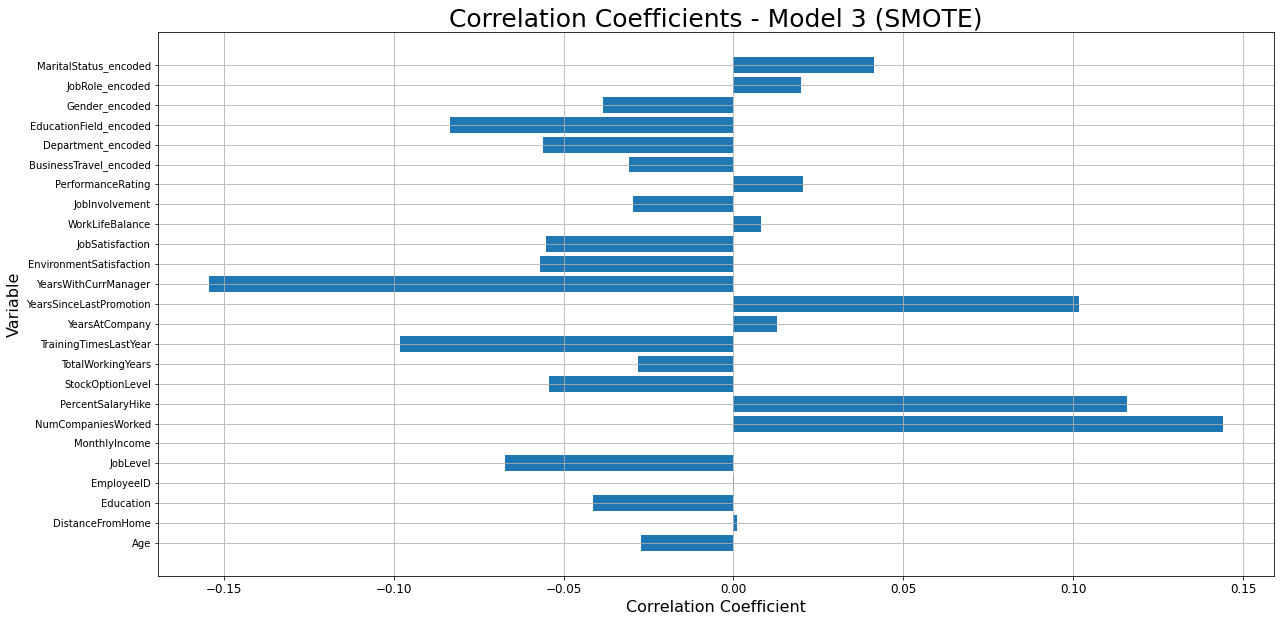

In [1022]:
plt.figure(figsize=(20, 10))
plt.barh(model3['features'], model3['coef3']);
plt.title('Correlation Coefficients - Model 3 (SMOTE)', fontsize=25)
plt.xlabel('Correlation Coefficient', fontsize=16 )
plt.ylabel('Variable', fontsize=16 )

# plt.gca() to get current axes of the plot.
ax = plt.gca()
plt.xticks(fontsize=12);
plt.grid()
plt.show

In [1023]:
y3_pred = logit_model3.predict(X3_test)

confusion matrix:

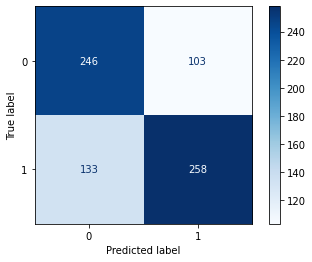

In [1024]:
# Generate the Confusion Matrix for this logistic regression model
cm3 = metrics.confusion_matrix(y3_test, y3_pred, labels=logit_model3.classes_)
disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=logit_model3.classes_)
disp3.plot(cmap='Blues')
plt.show()

In [1025]:
accuracy3 = pd.DataFrame(metrics.classification_report(y3_test, y3_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy3

,precision,recall,f1-score,support
No Attrition,0.649077,0.704871,0.675824,349.000000
Yes Attrition,0.714681,0.659847,0.686170,391.000000
accuracy,0.681081,0.681081,0.681081,0.681081
macro avg,0.681879,0.682359,0.680997,740.000000
weighted avg,0.683741,0.681081,0.681291,740.000000


_____

## Method 4 - Tomek Links

This model looks at fitting the regression model on the resampled set using Tomek Links from imblearn (https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

Tomek Links: pairs minority with majority nearest neighbours and then deletes the majority nearest neighbour. This gives more distance between the two groups, making it easier to classify the minority.

In [759]:
X4 = new_df.drop(['Attrition_encoded'], axis=1)
y4 = new_df['Attrition_encoded']

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X4, y4)

print('Original dataset shape', y4.shape)
print('Resample dataset shape', y_tl.shape)

# Split the dataset into X_train, X_test, y_train, and y_test
# Retain 10% of the data for testing
X4_train, X4_test, y4_train, y4_test = train_test_split(x_tl, y_tl, test_size=0.1)#, random_state=0) 

Original dataset shape (4410,)
Resample dataset shape (4037,)


Checkout distribution of sets:

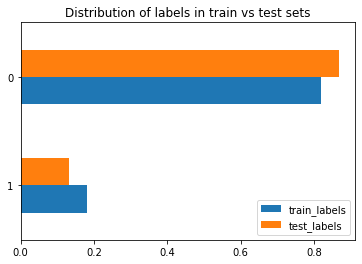

In [761]:
# Plot the distribution of train and test labels
train_labels4 = y4_train.value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
test_labels4 = y4_test.value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')

# Concatenate the number of examples in the train and test labels
label_counts4 = pd.concat([train_labels4, test_labels4], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts4.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

The training set and the test set both have equal amounts of both data

In [762]:
# Instantiate a Logistic Regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
logit_model4 = LogisticRegression()

# Fit the model using the training data
logit_model4.fit(X4_train, y4_train) 

# https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression-in-python
model4 = pd.DataFrame(zip(X4_train.columns, np.transpose(logit_model4.coef_.tolist()[0])), columns=['features', 'coef4'])
print(logit_model4.intercept_)
model4.sort_values('coef4', axis=0)

[0.00026341]


,features,coef4
9,TotalWorkingYears,-0.043742
11,YearsAtCompany,-0.032530
13,YearsWithCurrManager,-0.029799
0,Age,-0.026159
15,JobSatisfaction,-0.009119
14,EnvironmentSatisfaction,-0.008063
10,TrainingTimesLastYear,-0.004571
21,EducationField_encoded,-0.004562
16,WorkLifeBalance,-0.003074
20,Department_encoded,-0.001479


<function matplotlib.pyplot.show(close=None, block=None)>

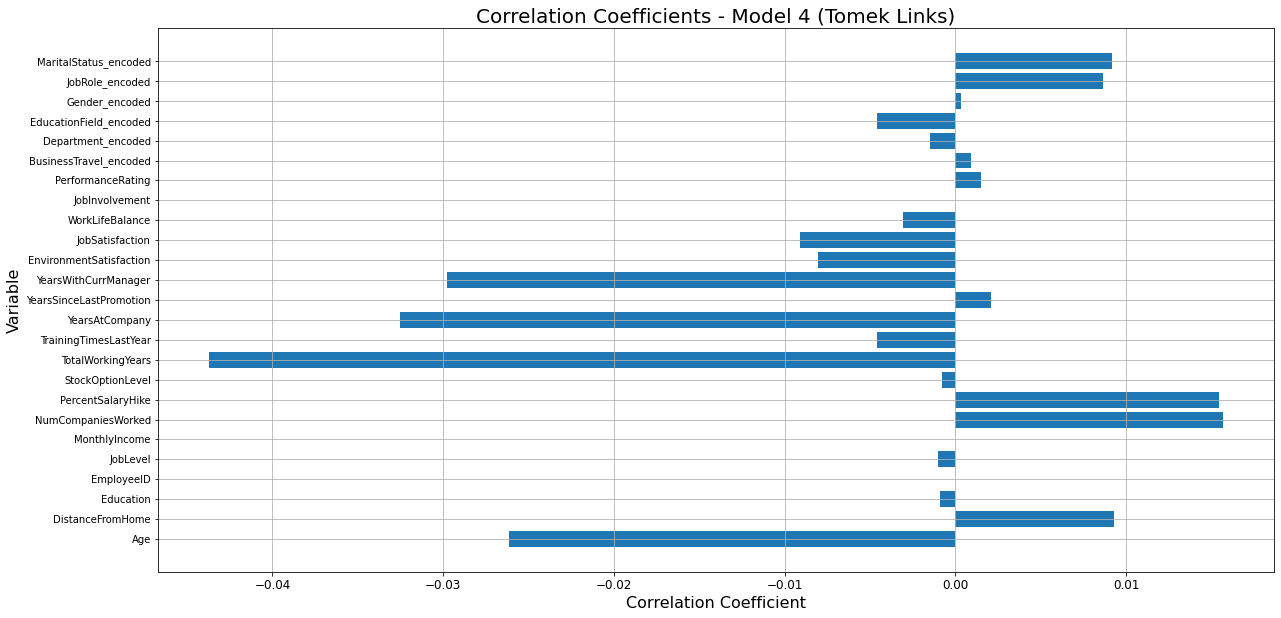

In [763]:
plt.figure(figsize=(20, 10))
plt.barh(model4['features'], model4['coef4']);
plt.title('Correlation Coefficients - Model 4 (Tomek Links)', fontsize=20)
plt.xlabel('Correlation Coefficient', fontsize=16 )
plt.ylabel('Variable', fontsize=16 )

# plt.gca() to get current axes of the plot.
ax = plt.gca()
plt.xticks(fontsize=12);
plt.grid()
plt.show

In [764]:
y4_pred = logit_model4.predict(X4_test)

confusion matrix:

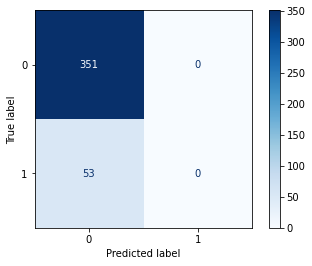

In [765]:
# Generate the Confusion Matrix for this logistic regression model
cm4 = metrics.confusion_matrix(y4_test, y4_pred, labels=logit_model4.classes_)
disp4 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=logit_model4.classes_)
disp4.plot(cmap='Blues')
plt.show()

In [816]:
accuracy4 = pd.DataFrame(metrics.classification_report(y4_test, y4_pred, target_names=['No Attrition', 'Yes Attrition'], output_dict=True)).transpose()
accuracy4

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
No Attrition,0.868812,1.000000,0.929801,351.000000
Yes Attrition,0.000000,0.000000,0.000000,53.000000
accuracy,0.868812,0.868812,0.868812,0.868812
macro avg,0.434406,0.500000,0.464901,404.000000
weighted avg,0.754834,0.868812,0.807822,404.000000


___

## Summary/Conclusion:

### Method 0 (No adaptation for imbalance)

In [930]:
accuracy0

,precision,recall,f1-score,support
No Attrition,0.827664,1.000000,0.905707,365.000000
Yes Attrition,0.000000,0.000000,0.000000,76.000000
accuracy,0.827664,0.827664,0.827664,0.827664
macro avg,0.413832,0.500000,0.452854,441.000000
weighted avg,0.685028,0.827664,0.749622,441.000000


This method did poorly. Although the accuracy was 0.85, it was unable to predict any 'yes' attrition cases. It classified all as no attrition. This is why it is very important to look at the precision and recall scores as well as accuracy when working with an imbalanced dataset. 

The correlation coefficients, in order of max, were:

In [929]:
# https://datatofish.com/convert-string-to-float-dataframe/
model0['abs_coef0'] = pd.to_numeric(model0['coef0'],errors='coerce').abs()
sorted_model0_df = model0.sort_values('abs_coef0', ascending= False, axis=0).reset_index()
print('The top 9:')
sorted_model0_df.head(9).drop('index', axis=1)

The top 9:


,features,coef0,abs_coef0
0,TotalWorkingYears,-0.045598,0.045598
1,YearsAtCompany,-0.033457,0.033457
2,YearsWithCurrManager,-0.029350,0.029350
3,Age,-0.026572,0.026572
4,NumCompaniesWorked,0.017361,0.017361
5,PercentSalaryHike,0.013838,0.013838
6,MaritalStatus_encoded,0.009492,0.009492
7,JobSatisfaction,-0.009479,0.009479
8,EnvironmentSatisfaction,-0.009053,0.009053


As can be seen, the top influencial factors for method 0 were:
- TotalWorkingYears: *more years worked less likely to leave* ***(negative correlation)***  
- YearsAtCompany: *more years at company less likely to leave* ***(negative correlation)*** 	 
- YearsWithCurrManager: *more years with current manager less likely to leave* ***(negative correlation)*** 	
- Age: *the older the person is the less likely they are to leave* ***(negative correlation)***	
- NumCompaniesWorked: *the more companies someone has worked at, the more likely they are to leave* ***(positive correlation)***  
- PercentSalaryHike: *the higher the person's salary increase, the more likely they are to leave the company* ***(positive correlation)***     
---   
- MaritalStatus_encoded ['Divorced' 'Married' 'Single' ] encoded as: [0, 1, 2]: *the more single someone is, the more likely they are to leave the company* ***(positive correlation)***  
- JobSatisfaction: *the less satisfied someone is with the job, the more likely they are to leave the company* ***(negative correlation)***    
- EnvironmentSatisfaction: *the less satisfied someone is with the environmeny, the more likely they are to leave the company* ***(negative correlation)***     

### Method 1 (Oversampling)

In [931]:
accuracy1

,precision,recall,f1-score,support
No Attrition,0.625000,0.531335,0.574374,367.000000
Yes Attrition,0.598131,0.686327,0.639201,373.000000
accuracy,0.609459,0.609459,0.609459,0.609459
macro avg,0.611565,0.608831,0.606788,740.000000
weighted avg,0.611456,0.609459,0.607050,740.000000


This method did okay. Although the accuracy was significantly lower than method 0, 0.61, it was able to predict any 'yes' attrition cases. 

The correlation coefficients, in order of max, were:

In [932]:
model1['abs_coef1'] = pd.to_numeric(model1['coef1'],errors='coerce').abs()
sorted_model1_df = model1.sort_values('abs_coef1', ascending= False, axis=0).reset_index()
sorted_model1_df.head(9).drop('index', axis=1)


,features,coef1,abs_coef1
0,TotalWorkingYears,-0.047441,0.047441
1,PercentSalaryHike,0.034588,0.034588
2,YearsAtCompany,-0.026497,0.026497
3,YearsWithCurrManager,-0.020885,0.020885
4,NumCompaniesWorked,0.013577,0.013577
5,DistanceFromHome,0.012364,0.012364
6,JobRole_encoded,0.012291,0.012291
7,MaritalStatus_encoded,0.009781,0.009781
8,PerformanceRating,0.006175,0.006175


As can be seen, the top influencial factors for method 1 were:
- TotalWorkingYears: *more years worked less likely to leave* ***(negative correlation)***  
- PercentSalaryHike: *the higher the person's salary increase, the more likely they are to leave the company* ***(positive correlation)***    
- YearsAtCompany: *more years at company less likely to leave* ***(negative correlation)*** 	 
- YearsWithCurrManager: *more years with current manager less likely to leave* ***(negative correlation)*** 	
- NumCompaniesWorked: *the more companies someone has worked at, the more likely they are to leave* ***(positive correlation)***  
- DistanceFromHome: *the further from the office a person lives, the more likely they are to leave*  ***(positive correlation)***  
- JobRole_encoding ['Healthcare Representative' 'Human Resources' 'Manager' 'Manufacturing Director''Laboratory Technician' 'Research Director' 'Research Scientist' 'Sales Executive''Sales Representative']: *indicates that Sales people are more likely to leave.*

---   
- MaritalStatus_encoded ['Divorced' 'Married' 'Single' ]: *the more single someone is, the more likely they are to leave the company* ***(positive correlation)***  
- PerformanceRating: *the higher the performance of an individual the more likely they are to leave* ***(positive correlation)*** 

### Method 2 (Undersampling)

In [934]:
accuracy2

,precision,recall,f1-score,support
No Attrition,0.742857,0.702703,0.722222,74.00000
Yes Attrition,0.698630,0.739130,0.718310,69.00000
accuracy,0.720280,0.720280,0.720280,0.72028
macro avg,0.720744,0.720917,0.720266,143.00000
weighted avg,0.721517,0.720280,0.720334,143.00000


This method did well and was the **best** out of all the methods for the logistic regression model. The accuracy was 0.72 and it was able to label both yes and no attrition with a similar precision and recall.

The correlation coefficients, in order of max, were:

In [935]:
model2['abs_coef2'] = pd.to_numeric(model2['coef2'],errors='coerce').abs()
sorted_model2_df = model2.sort_values('abs_coef2', ascending= False, axis=0).reset_index()
sorted_model2_df.head(9).drop('index', axis=1)



,features,coef2,abs_coef2
0,TotalWorkingYears,-0.041654,0.041654
1,YearsAtCompany,-0.026030,0.026030
2,YearsWithCurrManager,-0.025668,0.025668
3,PercentSalaryHike,0.024619,0.024619
4,JobRole_encoded,0.013397,0.013397
5,NumCompaniesWorked,0.011234,0.011234
6,DistanceFromHome,0.007596,0.007596
7,MaritalStatus_encoded,0.007579,0.007579
8,PerformanceRating,0.004896,0.004896


I would argue that these features listed in this order dictate the inferences that can be drawn for attrition. As can be seen, the top influencial factors for method 2 were:
- TotalWorkingYears: *more years worked less likely to leave* ***(negative correlation)***  
- YearsAtCompany: *more years at company less likely to leave* ***(negative correlation)*** 
- YearsWithCurrManager: *more years with current manager less likely to leave* ***(negative correlation)*** 
- PercentSalaryHike: *the higher the person's salary increase, the more likely they are to leave the company* ***(positive correlation)***    
___
- JobRole_encoding ['Healthcare Representative' 'Human Resources' 'Manager' 'Manufacturing Director''Laboratory Technician' 'Research Director' 'Research Scientist' 'Sales Executive''Sales Representative']: *indicates that Sales people are more likely to leave.*
- NumCompaniesWorked: *the more companies someone has worked at, the more likely they are to leave* ***(positive correlation)***  
---  
- DistanceFromHome: *the further from the office a person lives, the more likely they are to leave*  ***(positive correlation)***  
- MaritalStatus_encoded ['Divorced' 'Married' 'Single' ]: *the more single someone is, the more likely they are to leave the company* ***(positive correlation)***  
- PerformanceRating: *the higher the performance of an individual the more likely they are to leave* ***(positive correlation)*** 


### Method 3 (SMOTE)

In [938]:
accuracy3

,precision,recall,f1-score,support
No Attrition,0.632653,0.589674,0.610408,368.000000
Yes Attrition,0.619647,0.661290,0.639792,372.000000
accuracy,0.625676,0.625676,0.625676,0.625676
macro avg,0.626150,0.625482,0.625100,740.000000
weighted avg,0.626115,0.625676,0.625179,740.000000


This method did okay, similarily to method 1. The accuracy was significantly lower than method 2, 0.63. It was able to predict slightly better both yes and no cases than method 1.

The correlation coefficients, in order of max, were:

In [939]:
model3['abs_coef3'] = pd.to_numeric(model3['coef3'],errors='coerce').abs()
sorted_model3_df = model3.sort_values('abs_coef3', ascending= False, axis=0).reset_index()
sorted_model3_df.head(9).drop('index', axis=1)


,features,coef3,abs_coef0,abs_coef3
0,TotalWorkingYears,-0.048356,0.048356,0.048356
1,YearsAtCompany,-0.039892,0.039892,0.039892
2,PercentSalaryHike,0.034207,0.034207,0.034207
3,YearsWithCurrManager,-0.033725,0.033725,0.033725
4,NumCompaniesWorked,0.017543,0.017543,0.017543
5,EducationField_encoded,-0.006386,0.006386,0.006386
6,JobRole_encoded,0.006260,0.006260,0.006260
7,TrainingTimesLastYear,-0.006076,0.006076,0.006076
8,PerformanceRating,0.005157,0.005157,0.005157


As can be seen, the top influencial factors for method 3 were:
- TotalWorkingYears: *more years worked less likely to leave* ***(negative correlation)***  
- YearsAtCompany: *more years at company less likely to leave* ***(negative correlation)*** 
- PercentSalaryHike: *the higher the person's salary increase, the more likely they are to leave the company* ***(positive correlation)***  
- YearsWithCurrManager: *more years with current manager less likely to leave* ***(negative correlation)*** 
___
- NumCompaniesWorked: *the more companies someone has worked at, the more likely they are to leave* ***(positive correlation)***  
---  
- EducationField_encoded ['Human Resources''Life Sciences' 'Medical'  'Marketing'  'Other' 'Technical Degree' ]: *individuals in human resources, tend to be more likely to leave*
- JobRole_encoded ['Healthcare Representative' 'Human Resources' 'Manager' 'Manufacturing Director''Laboratory Technician' 'Research Director' 'Research Scientist' 'Sales Executive''Sales Representative']: *indicates that Sales people are more likely to leave.*
- TrainingTimesLastYear: *the more training an individual has, the less likely they are to leave* ***(negative correlation)*** 
- PerformanceRating: *the higher the performance of an individual the more likely they are to leave* ***(positive correlation)*** 

### Method 4 (Tomek Links)

In [941]:
accuracy4

,precision,recall,f1-score,support
No Attrition,0.868812,1.000000,0.929801,351.000000
Yes Attrition,0.000000,0.000000,0.000000,53.000000
accuracy,0.868812,0.868812,0.868812,0.868812
macro avg,0.434406,0.500000,0.464901,404.000000
weighted avg,0.754834,0.868812,0.807822,404.000000


This method did poorly, likely method 0. Although the accuracy was 0.87, it was unable to predict any 'yes' attrition cases. It classified all as no attrition. 

The correlation coefficients, in order of max, were:

In [937]:
model4['abs_coef4'] = pd.to_numeric(model4['coef4'],errors='coerce').abs()
sorted_model4_df = model4.sort_values('abs_coef4', ascending= False, axis=0).reset_index()
sorted_model4_df.head(9).drop('index', axis=1)


,features,coef4,abs_coef4
0,TotalWorkingYears,-0.043742,0.043742
1,YearsAtCompany,-0.032530,0.032530
2,YearsWithCurrManager,-0.029799,0.029799
3,Age,-0.026159,0.026159
4,NumCompaniesWorked,0.015682,0.015682
5,PercentSalaryHike,0.015440,0.015440
6,DistanceFromHome,0.009293,0.009293
7,MaritalStatus_encoded,0.009151,0.009151
8,JobSatisfaction,-0.009119,0.009119


As can be seen, the top influencial factors for method 4 were:
- TotalWorkingYears: *more years worked less likely to leave* ***(negative correlation)***  
- YearsAtCompany: *more years at company less likely to leave* ***(negative correlation)*** 
- YearsWithCurrManager: *more years with current manager less likely to leave* ***(negative correlation)***
- Age: *the older the person is the less likely they are to leave* ***(negative correlation)***	
___
- NumCompaniesWorked: *the more companies someone has worked at, the more likely they are to leave* ***(positive correlation)***  
- PercentSalaryHike: *the higher the person's salary increase, the more likely they are to leave the company* ***(positive correlation)*** 
---  
- DistanceFromHome: *the further from the office a person lives, the more likely they are to leave*  ***(positive correlation)***  
- MaritalStatus_encoded ['Divorced' 'Married' 'Single' ]: *the more single someone is, the more likely they are to leave the company* ***(positive correlation)***  
- JobSatisfaction: *the less satisfied someone is with the job, the more likely they are to leave the company* ***(negative correlation)***  

---

## Which method did best?

### Method 2: Undersampling using imblearn

Here is a summary table of the top 9 regression coefficients along with the metrics for each method:

In [919]:
combined_conclusion_df = pd.DataFrame({
    'Method0_Control' : sorted_model0_df.head(9)['features'],
    'Method1_Over' : sorted_model1_df.head(9)['features'],
    'Method2_Under' : sorted_model2_df.head(9)['features'],
    'Method3_SMOTE' : sorted_model3_df.head(9)['features'],
    'Method4_Tomek' : sorted_model4_df.head(9)['features'],
})

# Creating list of metric values
precision_no_list = [accuracy0['precision']['No Attrition'], accuracy1['precision']['No Attrition'], accuracy2['precision']['No Attrition'], accuracy3['precision']['No Attrition'], accuracy4['precision']['No Attrition']]
precision_yes_list = [accuracy0['precision']['Yes Attrition'], accuracy1['precision']['Yes Attrition'], accuracy2['precision']['Yes Attrition'], accuracy3['precision']['Yes Attrition'], accuracy4['precision']['Yes Attrition']]
recall_no_list = [accuracy0['recall']['No Attrition'], accuracy1['recall']['No Attrition'], accuracy2['recall']['No Attrition'], accuracy3['recall']['No Attrition'], accuracy4['recall']['No Attrition']]
recall_yes_list = [accuracy0['recall']['Yes Attrition'], accuracy1['recall']['Yes Attrition'], accuracy2['recall']['Yes Attrition'], accuracy3['recall']['Yes Attrition'], accuracy4['recall']['Yes Attrition']]
f1_no_list = [accuracy0['f1-score']['No Attrition'], accuracy1['f1-score']['No Attrition'], accuracy2['f1-score']['No Attrition'], accuracy3['f1-score']['No Attrition'], accuracy4['f1-score']['No Attrition']]
f1_yes_list = [accuracy0['f1-score']['Yes Attrition'], accuracy1['f1-score']['Yes Attrition'], accuracy2['f1-score']['Yes Attrition'], accuracy3['f1-score']['Yes Attrition'], accuracy4['f1-score']['Yes Attrition']]
accuracy_list = [accuracy0['f1-score']['accuracy'], accuracy1['f1-score']['accuracy'], accuracy2['f1-score']['accuracy'], accuracy3['f1-score']['accuracy'], accuracy4['f1-score']['accuracy']]


# Add precision/recall/f1-scores/accuracy as rows in df:
combined_conclusion_df.loc[9] = precision_no_list
combined_conclusion_df.loc[10] = precision_yes_list
combined_conclusion_df.loc[11] = recall_no_list
combined_conclusion_df.loc[12] = recall_yes_list
combined_conclusion_df.loc[13] = f1_no_list
combined_conclusion_df.loc[14] = f1_yes_list
combined_conclusion_df.loc[15] = accuracy_list

# Rename indices:
combined_conclusion_df = combined_conclusion_df.set_axis(['1', '2', '3', '4', '5', '6', '7', '8', '9',
                                 'no_precision', 'yes_precision',
                                 'no_recall', 'yes_recall',
                                 'no_f1', 'yes_f1',
                                 'accuracy'
                                ], axis=0)

# Save to png
# dfi.export(combined_conclusion_df, '/Users/anjawu/Documents/Learning/VectorInstitute-ML/assignments/Capstone/images/regression_coefficient_comparison.png')
combined_conclusion_df


,Method0_Control,Method1_Over,Method2_Under,Method3_SMOTE,Method4_Tomek
1,TotalWorkingYears,TotalWorkingYears,TotalWorkingYears,TotalWorkingYears,TotalWorkingYears
2,YearsAtCompany,PercentSalaryHike,YearsAtCompany,YearsAtCompany,YearsAtCompany
3,YearsWithCurrManager,YearsAtCompany,YearsWithCurrManager,PercentSalaryHike,YearsWithCurrManager
4,Age,YearsWithCurrManager,PercentSalaryHike,YearsWithCurrManager,Age
5,NumCompaniesWorked,NumCompaniesWorked,JobRole_encoded,NumCompaniesWorked,NumCompaniesWorked
6,PercentSalaryHike,DistanceFromHome,NumCompaniesWorked,EducationField_encoded,PercentSalaryHike
7,MaritalStatus_encoded,JobRole_encoded,DistanceFromHome,JobRole_encoded,DistanceFromHome
8,JobSatisfaction,MaritalStatus_encoded,MaritalStatus_encoded,TrainingTimesLastYear,MaritalStatus_encoded
9,EnvironmentSatisfaction,PerformanceRating,PerformanceRating,PerformanceRating,JobSatisfaction
no_precision,0.827664,0.625,0.742857,0.632653,0.868812
